In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 600M/612M [00:02<00:00, 195MB/s]
100% 612M/612M [00:03<00:00, 211MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip')
zip.extractall('/content')
zip.close()

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
imgs_path = "/content/train"
data = []
labels = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("Done")

Done


In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


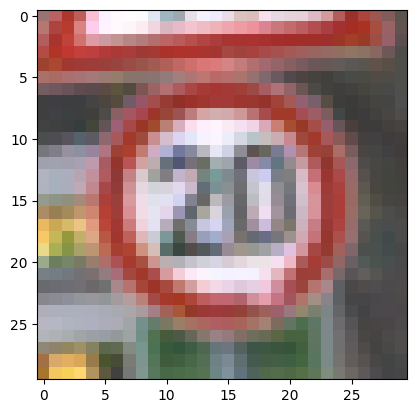

In [7]:
path = "/content/Train/0/00000_00000_00010.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 19s 7ms/step - loss: 1.8997 - accuracy: 0.5122 - val_loss: 0.4649 - val_accuracy: 0.8815
Epoch 2/25
981/981 [==============================] - 7s 7ms/step - loss: 0.7078 - accuracy: 0.7907 - val_loss: 0.2335 - val_accuracy: 0.9401
Epoch 3/25
981/981 [==============================] - 6s 7ms/step - loss: 0.5233 - accuracy: 0.8468 - val_loss: 0.1716 - val_accuracy: 0.9566
Epoch 4/25
981/981 [==============================] - 6s 6ms/step - loss: 0.4327 - accuracy: 0.8706 - val_loss: 0.1812 - val_accuracy: 0.9513
Epoch 5/25
981/981 [==============================] - 6s 6ms/step - loss: 0.3855 - accuracy: 0.8855 - val_loss: 0.1127 - val_accuracy: 0.9670
Epoch 6/25
981/981 [==============================] - 6s 6ms/step - loss: 0.3462 - accuracy: 0.8992 - val_loss: 0.1368 - val_accuracy: 0.9612
Epoch 7/25
981/981 [==============================] - 8s 8ms/step - loss: 0.3065 - accuracy: 0.9098 - val_loss: 0.0828 - val_accuracy: 0.9739
Epoch

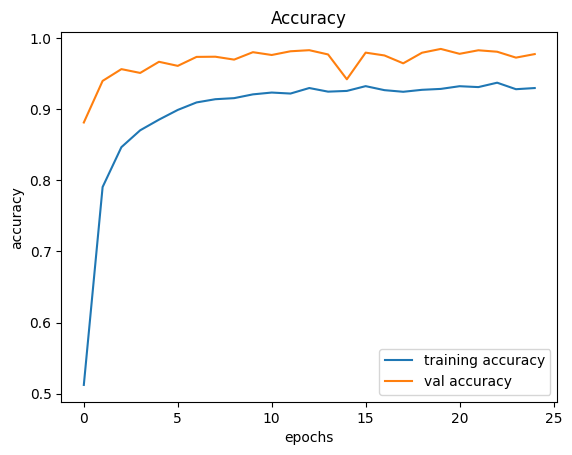

In [14]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

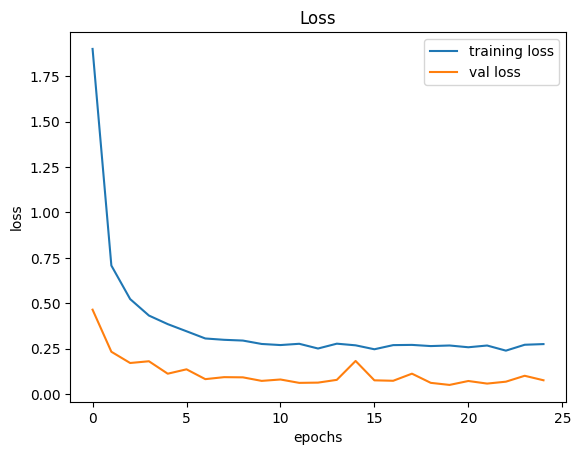

In [15]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [17]:
X_test, label = testing('/content/Test.csv')

In [18]:
predict_x = model.predict(X_test)
Y_pred =np.argmax(predict_x,axis=1)
Y_pred

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ...,  3,  7, 10])

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9398258115597783


In [20]:
model.save("./training/TSR.h5")

In [45]:
import os
os.chdir(r'/content/drive/MyDrive/Bank')
model.save("/content/drive/MyDrive/Bank/TSR.h5")

In [44]:
from keras.models import load_model
model = load_model('/content/training/TSR.h5')

In [46]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x = model.predict(X_test)
    Y_pred =np.argmax(predict_x,axis=1)
 
    return image,Y_pred

1/1 [==============================] - 0s 227ms/step
Predicted traffic sign is:  Speed limit (70km/h)


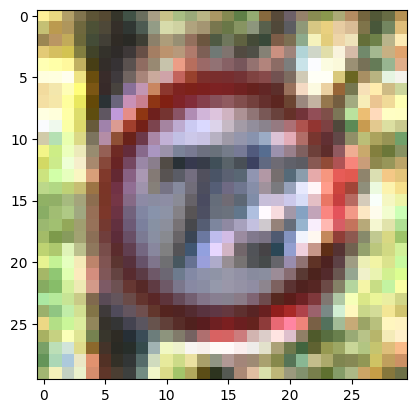

In [48]:
plot,prediction = test_on_img(r'/content/Test/00014.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [49]:
import keras as k
k.__version__

'2.12.0'

In [50]:
import tensorflow as tf
tf.__version__


'2.12.0'